In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import numpy as np
import pytesseract as pt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
image_dir="E:\Projects\Optical Character Recognition\Images\Images Project 3"

In [3]:
import os
os.listdir(image_dir)

['car1.jpg', 'car2.jpg', 'car3.jpg']

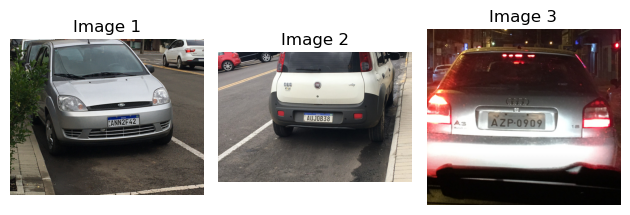

In [4]:
c=1
for img in os.listdir(image_dir):
    path=os.path.join(image_dir,img)
    image=cv.imread(path)
    image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
    plt.subplot(1,3,c)
    plt.imshow(image)
    plt.title(f'Image {c}')
    plt.axis('off')
    c+=1
plt.tight_layout()
plt.show()

Working with a single image

In [5]:
img_path="E:\Projects\Optical Character Recognition\Images\Images Project 3\car1.jpg"

In [6]:
img=cv.imread(img_path)

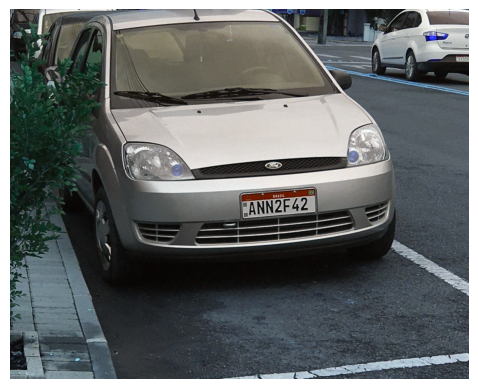

In [7]:
plt.imshow(img)
plt.axis('off')
plt.show()

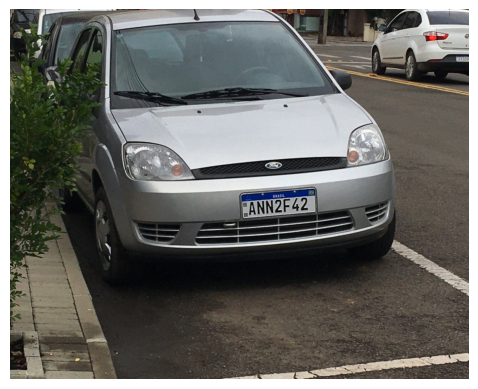

In [8]:
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

Grayscaling the Images

In [9]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

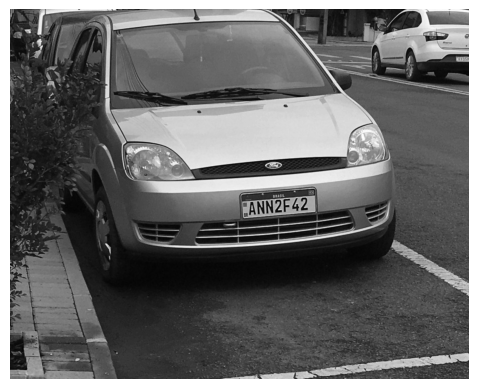

In [10]:
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

Applying Gaussian Blur On the Image

In [11]:
blur=cv.bilateralFilter(gray,11,17,17)

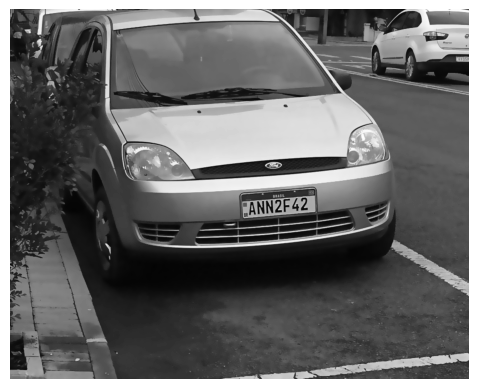

In [12]:
plt.imshow(blur,cmap='gray')
plt.axis('off')
plt.show()

Edge Detection

In [13]:
threshold,thresh=cv.threshold(blur,150,255,cv.THRESH_TRUNC)

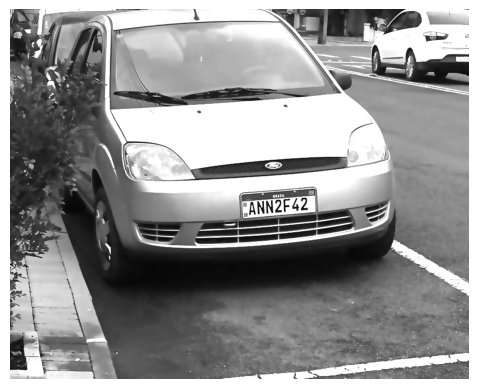

In [14]:
plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show()

In [15]:
canny=cv.Canny(blur,30,200)

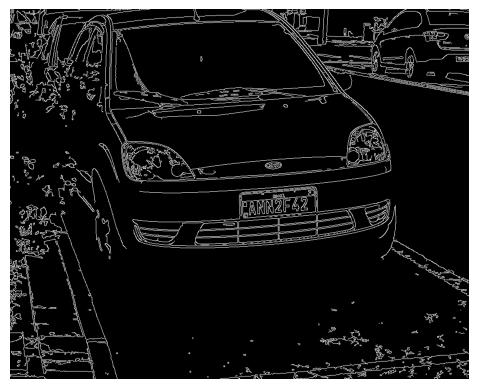

In [16]:
plt.imshow(canny,cmap='gray')
plt.axis('off')
plt.show()

Contour Selection

In [17]:
import imutils
cont=cv.findContours(canny.copy(),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cont=imutils.grab_contours(cont)

In [18]:
cont

(array([[[459, 739]],
 
        [[458, 740]],
 
        [[457, 740]],
 
        [[460, 740]],
 
        [[460, 739]]], dtype=int32),
 array([[[395, 736]],
 
        [[395, 737]],
 
        [[396, 736]],
 
        [[397, 737]],
 
        [[397, 736]]], dtype=int32),
 array([[[170, 736]],
 
        [[170, 739]],
 
        [[171, 740]],
 
        [[170, 739]]], dtype=int32),
 array([[[501, 735]],
 
        [[501, 736]],
 
        [[503, 738]],
 
        [[503, 739]],
 
        [[504, 740]],
 
        [[504, 739]],
 
        [[503, 738]],
 
        [[503, 737]],
 
        [[502, 736]],
 
        [[503, 735]],
 
        [[505, 735]],
 
        [[506, 736]],
 
        [[505, 735]],
 
        [[503, 735]],
 
        [[502, 736]]], dtype=int32),
 array([[[453, 733]],
 
        [[452, 734]],
 
        [[452, 735]],
 
        [[453, 735]],
 
        [[452, 734]],
 
        [[453, 733]],
 
        [[454, 733]],
 
        [[455, 734]],
 
        [[454, 733]]], dtype=int32),
 array([[[856, 732]],
 

In [19]:
cont=sorted(cont,key=cv.contourArea,reverse=True)[:8]

In [20]:
len(cont)

8

In [21]:
location=None
for c in cont:
    p=cv.arcLength(c,True)
    approx=cv.approxPolyDP(c,0.02*p,True)
    if cv.isContourConvex(approx):
        if len(approx)==4:
            location=approx
            break

In [22]:
mask=np.zeros(gray.shape,np.uint8)

In [23]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
type(location)

numpy.ndarray

In [25]:
img_plate=cv.drawContours(mask,[location],0,255,-1)

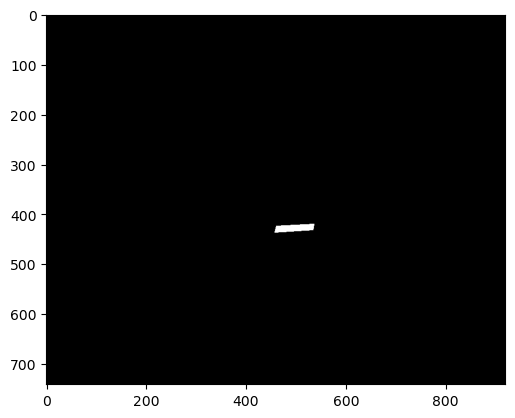

In [26]:
plt.imshow(img_plate,cmap='gray')

In [27]:
img_plate = cv.bitwise_and(img, img, mask=mask)

In [29]:
(y, x) = np.where(mask==255)
(beginX, beginY) = (np.min(x), np.min(y))
(endX, endY) = (np.max(x), np.max(y))

In [34]:
beginX, beginY, endX, endY=(466, 375, 611, 417)


In [35]:
plate = gray[beginY:endY, beginX:endX]


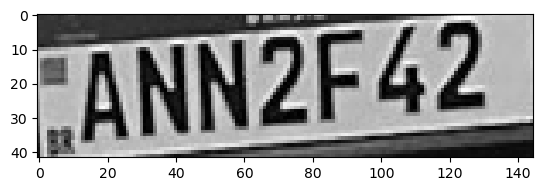

In [36]:
plt.imshow(plate,cmap='gray')

In [39]:
text=pt.image_to_string(plate,config=f'--psm {6}')

In [40]:
text

'=ANNZF 42\n'

In [41]:
text = "".join(character for character in text if character.isalnum())
text

'ANNZF42'

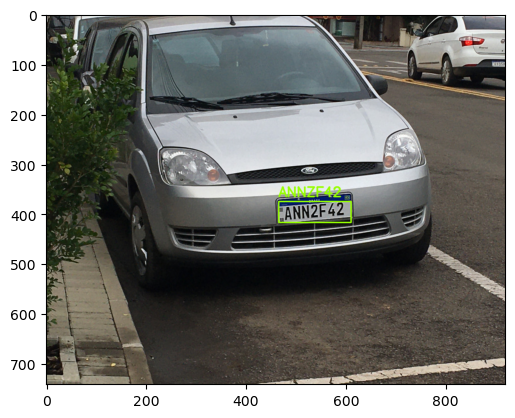

In [43]:
img_final = cv.putText(img, text, (beginX, beginY - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (150,255,0), 2, lineType=cv.LINE_AA)
img_final = cv.rectangle(img, (beginX, beginY), (endX, endY), (150, 255, 0), 2)
plt.imshow(img_final)